<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_group4_mini_project(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **미니 프로젝트(2)**
## **ESAA YB 4조**


## **EDA**

In [ ]:
# 필요한 라이브러리 인코딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.shape

(5497, 14)

In [ ]:
test.shape

(1000, 13)

In [ ]:
train.head()

index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red  
2  0.99176  3.05       0.52     10.9  white  
3  0.99390  3.26       0.50     10.8  white  
4  0.99550  3.04       0.43     10.9  white

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [ ]:
# train data의 분포
train.describe()

index      quality  fixed acidity  volatile acidity  citric acid  \
count  5497.000000  5497.000000    5497.000000       5497.000000  5497.000000   
mean   2748.000000     5.818992       7.210115          0.338163     0.318543   
std    1586.991546     0.870311       1.287579          0.163224     0.145104   
min       0.000000     3.000000       3.800000          0.080000     0.000000   
25%    1374.000000     5.000000       6.400000          0.230000     0.250000   
50%    2748.000000     6.000000       7.000000          0.290000     0.310000   
75%    4122.000000     6.000000       7.700000          0.400000     0.390000   
max    5496.000000     9.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     5497.000000  5497.000000          5497.000000           5497.000000   
mean         5.438075     0.055808            30.417682            115.566491   
std          4.756676     0.034653            17.673881             56.288223   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             78.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.064000            41.000000            155.000000   
max         65.800000     0.610000           289.000000            440.000000   

           density           pH    sulphates      alcohol  
count  5497.000000  5497.000000  5497.000000  5497.000000  
mean      0.994673     3.219502     0.530524    10.504918  
std       0.003014     0.160713     0.149396     1.194524  
min       0.987110     2.740000     0.220000     8.000000  
25%       0.992300     3.110000     0.430000     9.500000  
50%       0.994800     3.210000     0.510000    10.300000  
75%       0.996930     3.320000     0.600000    11.300000  
max       1.038980     4.010000     2.000000    14.900000

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [ ]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [ ]:
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

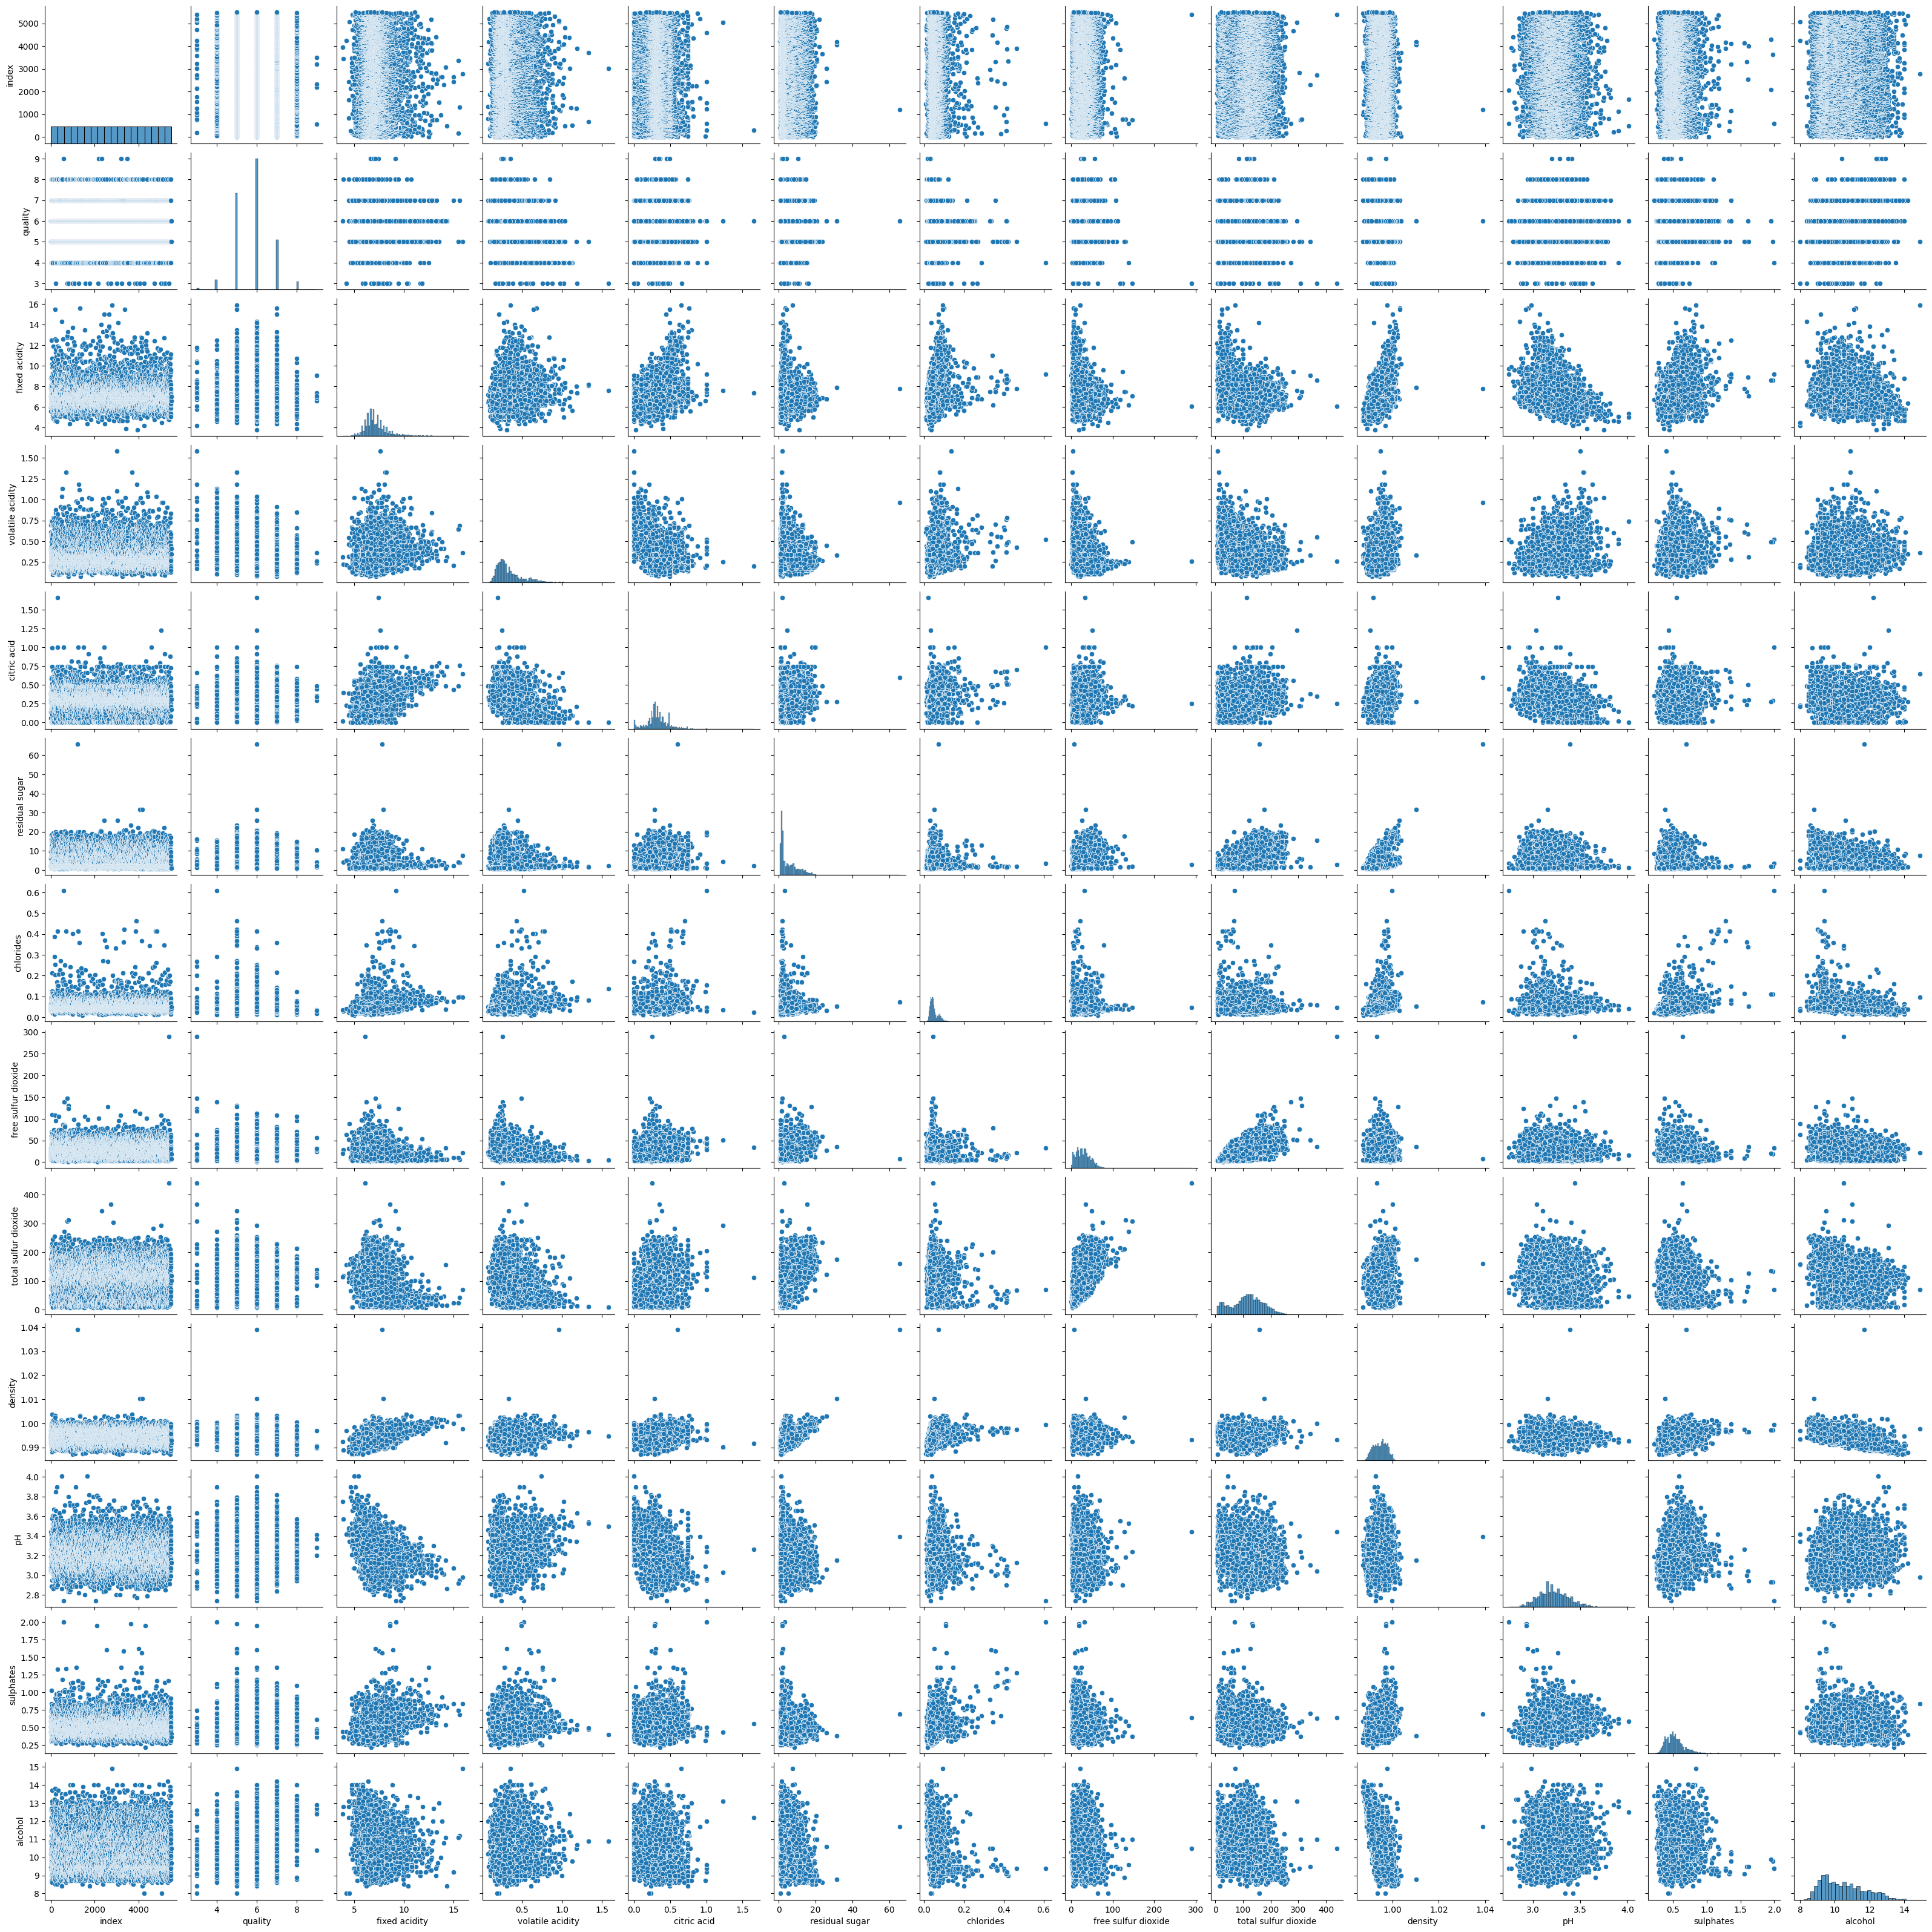

In [ ]:
sns.pairplot(train)

<Axes: >

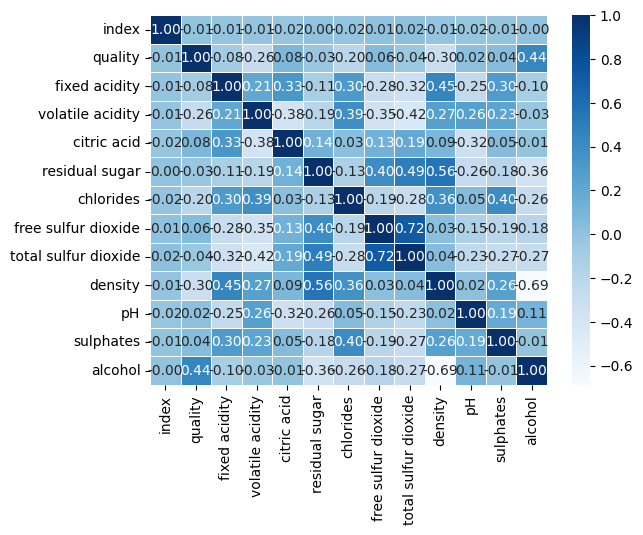

In [ ]:
# train 변수 간 상관관계
train_float = train.drop(columns=['type'], axis=1)
corr_matrix = train_float.corr()
sns.heatmap(data = corr_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# train의 quality와 다른 변수 간의 상관관계
train_float.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.439615
citric acid             0.079157
free sulfur dioxide     0.055574
sulphates               0.042068
pH                      0.017931
index                  -0.008045
residual sugar         -0.032848
total sulfur dioxide   -0.039732
fixed acidity          -0.076506
chlorides              -0.198148
volatile acidity       -0.261557
density                -0.299831
Name: quality, dtype: float64

In [ ]:
# train data의 분포
train['quality'].value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

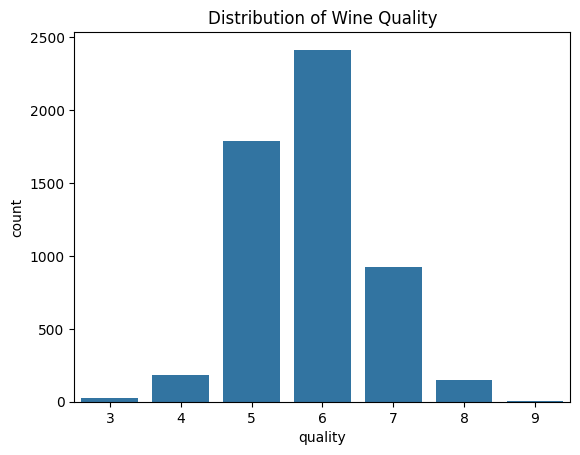

In [ ]:
sns.countplot(x='quality', data=train)
plt.title('Distribution of Wine Quality')
plt.show()

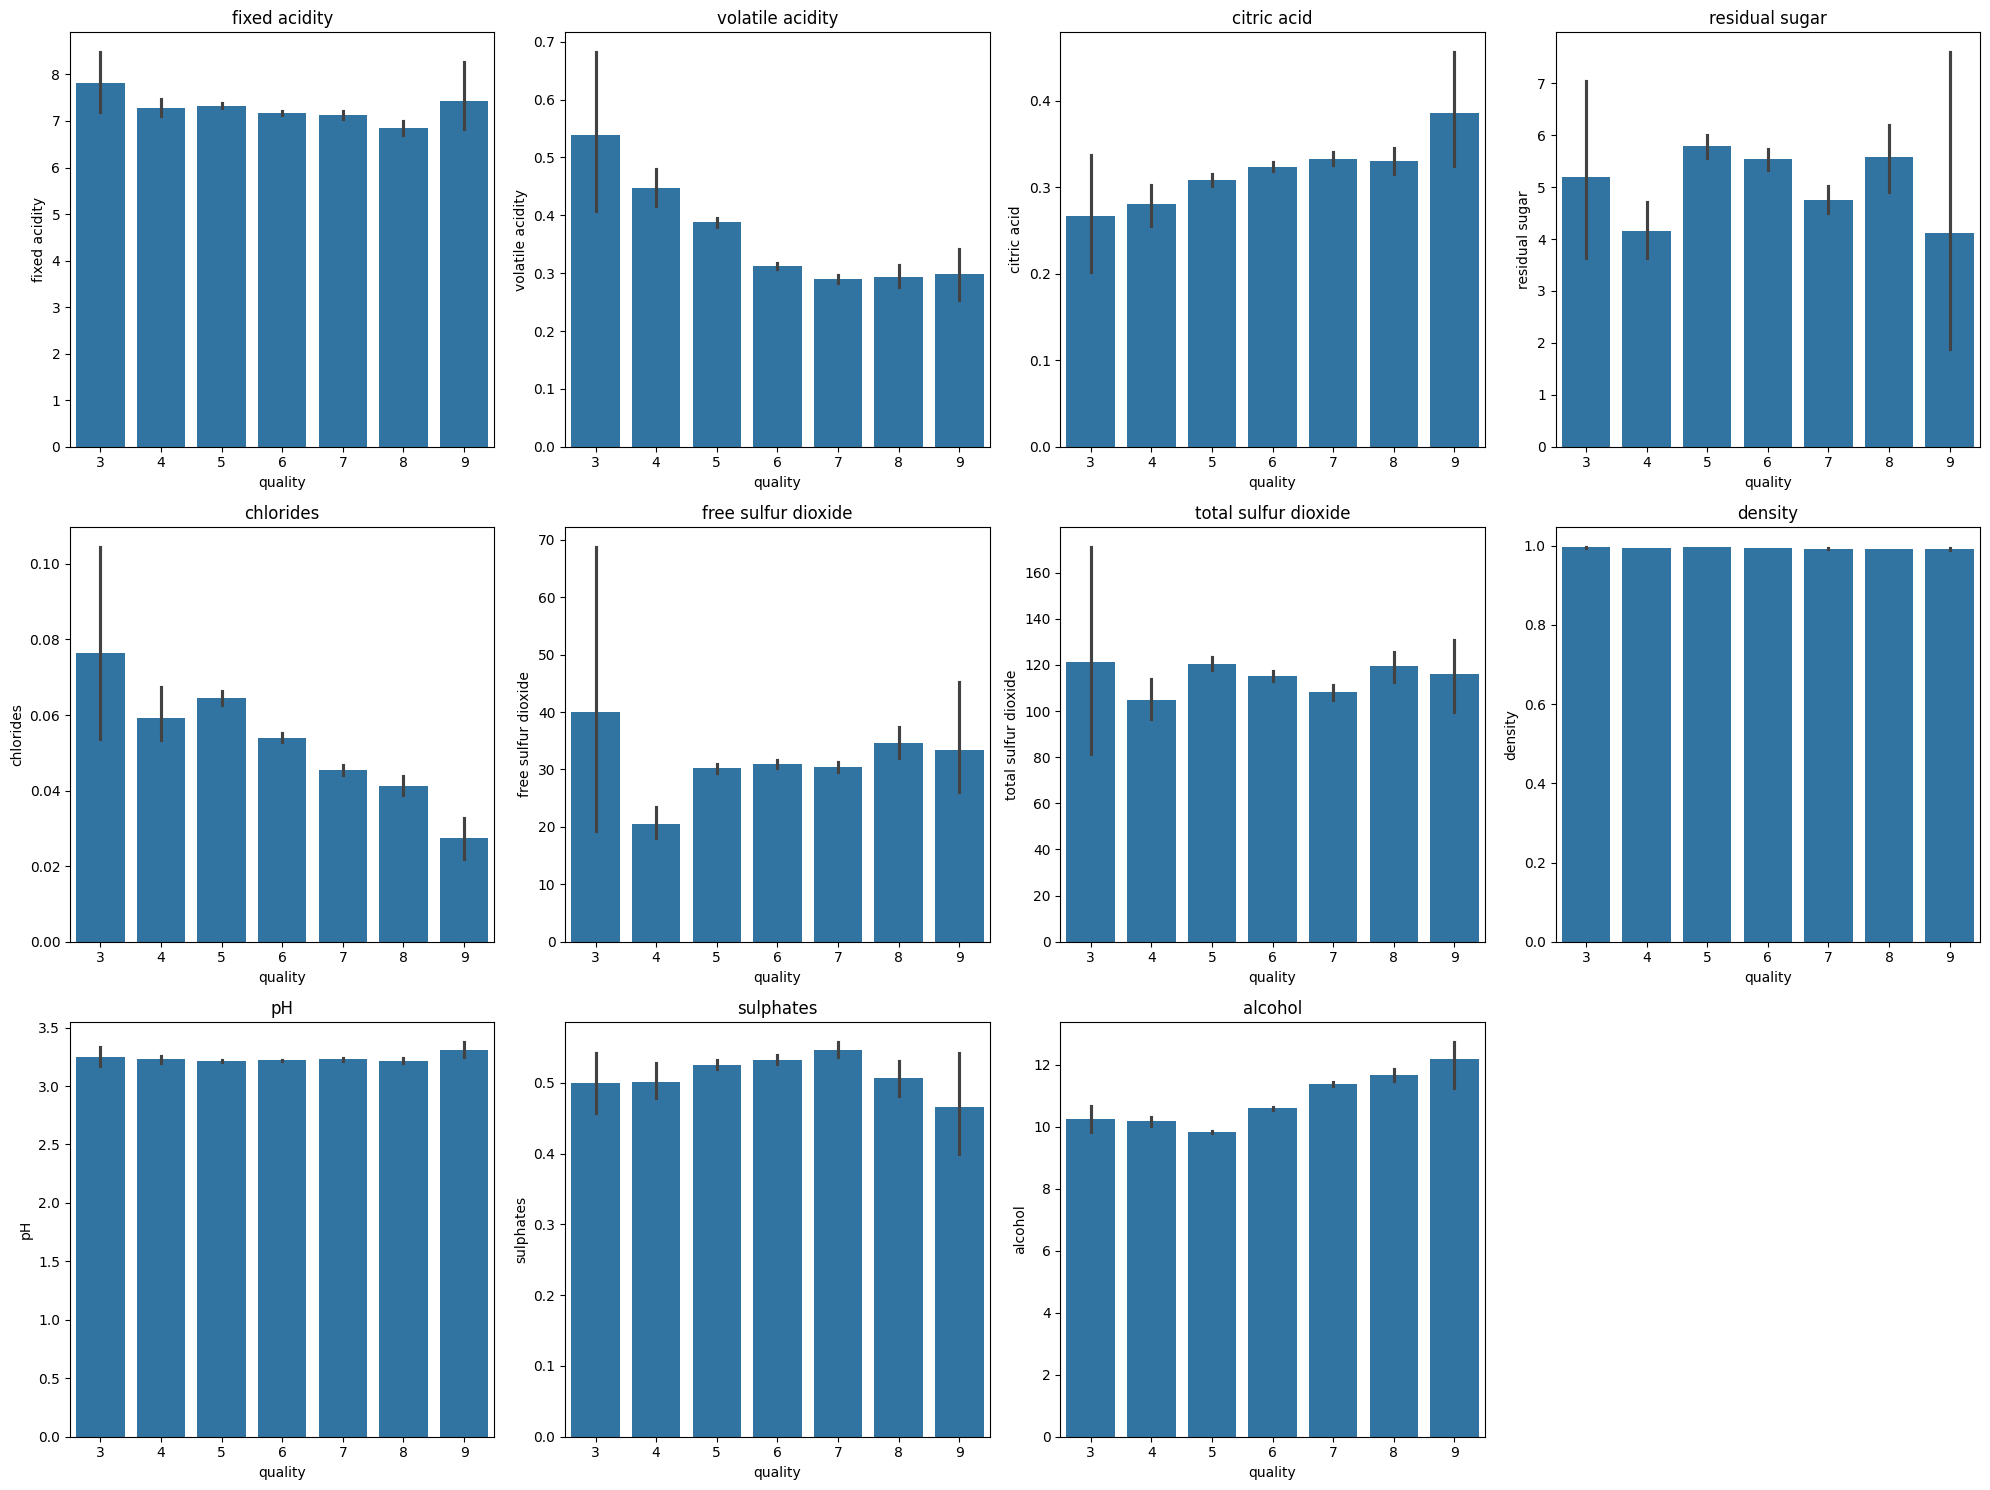

In [ ]:
plt.figure(figsize=(20, 15))
for i in range(11):
    plt.subplot(3, 4, i+1)
    sns.barplot(
        x='quality',
        y=train.columns[i+2],
        data=train
    )
    plt.title(train.columns[i+2])

plt.tight_layout()
plt.show()

In [ ]:
# 이상치 탐색

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [ ]:
for col in train.select_dtypes(include='number').columns:
    outliers = detect_outliers_iqr(train, col)
    print(f"{col}: {len(outliers)} outliers")

index: 0 outliers
quality: 183 outliers
fixed acidity: 294 outliers
volatile acidity: 314 outliers
citric acid: 430 outliers
residual sugar: 106 outliers
chlorides: 259 outliers
free sulfur dioxide: 47 outliers
total sulfur dioxide: 9 outliers
density: 3 outliers
pH: 60 outliers
sulphates: 161 outliers
alcohol: 3 outliers


## quality와 상관관계가 높은 Top 3의 outliers

In [ ]:
detect_outliers_iqr(train, 'alcohol')

index  quality  fixed acidity  volatile acidity  citric acid  \
2787   2787        5           15.9              0.36         0.65   
4964   4964        7            5.8              0.61         0.01   
5340   5340        7            6.4              0.35         0.28   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
2787             7.5      0.096                 22.0                  71.0   
4964             8.4      0.041                 31.0                 104.0   
5340             1.6      0.037                 31.0                 113.0   

      density    pH  sulphates  alcohol   type  
2787  0.99760  2.98       0.84    14.90    red  
4964  0.99090  3.26       0.72    14.05  white  
5340  0.98779  3.12       0.40    14.20  white

In [ ]:
detect_outliers_iqr(train, 'citric acid')

index  quality  fixed acidity  volatile acidity  citric acid  \
23       23        6            7.7             0.715         0.01   
28       28        6            6.1             0.410         0.00   
34       34        6            6.6             0.190         0.99   
37       37        5            6.6             0.735         0.02   
39       39        5            6.4             0.180         0.74   
...     ...      ...            ...               ...          ...   
5445   5445        4           10.2             0.440         0.88   
5450   5450        7            6.6             0.580         0.02   
5452   5452        6            9.1             0.785         0.00   
5457   5457        5            7.4             0.610         0.01   
5490   5490        6           11.1             0.450         0.73   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
23               2.1      0.064                 31.0                  43.0   
28               1.6      0.063                 36.0                  87.0   
34               1.2      0.122                 45.0                 129.0   
37               7.9      0.122                 68.0                 124.0   
39              11.9      0.046                 54.0                 168.0   
...              ...        ...                  ...                   ...   
5445             6.2      0.049                 20.0                 124.0   
5450             2.0      0.062                 37.0                  53.0   
5452             2.6      0.093                 11.0                  28.0   
5457             2.0      0.074                 13.0                  38.0   
5490             3.2      0.066                  6.0                  22.0   

      density    pH  sulphates  alcohol   type  
23    0.99371  3.41       0.57     11.8    red  
28    0.99140  3.27       0.67     10.8  white  
34    0.99360  3.09       0.31      8.7  white  
37    0.99940  3.47       0.53      9.9    red  
39    0.99780  3.58       0.68     10.1  white  
...       ...   ...        ...      ...    ...  
5445  0.99680  2.99       0.51      9.9  white  
5450  0.99374  3.35       0.76     11.6    red  
5452  0.99940  3.36       0.86      9.4    red  
5457  0.99748  3.48       0.65      9.8    red  
5490  0.99860  3.17       0.66     11.2    red  

[430 rows x 14 columns]

In [ ]:
detect_outliers_iqr(train, 'free sulfur dioxide')

index  quality  fixed acidity  volatile acidity  citric acid  \
38       38        5            6.8             0.260         0.22   
184     184        6            6.2             0.220         0.30   
208     208        8            5.8             0.170         0.34   
363     363        8            6.7             0.240         0.30   
550     550        5            7.6             0.360         0.49   
559     559        6            6.5             0.350         0.28   
606     606        4            6.2             0.255         0.24   
607     607        6            8.0             0.220         0.28   
609     609        6            6.2             0.250         0.48   
616     616        6            6.7             0.170         0.42   
636     636        7            6.3             0.220         0.27   
747     747        3            7.1             0.490         0.22   
793     793        5            7.5             0.270         0.31   
795     795        3            9.4             0.240         0.29   
1052   1052        6            6.5             0.270         0.19   
1247   1247        5            6.8             0.270         0.12   
1532   1532        8            6.7             0.240         0.30   
1679   1679        6            6.5             0.270         0.19   
1873   1873        6            6.8             0.150         0.41   
2025   2025        5            6.9             0.240         0.40   
2190   2190        5            6.0             0.230         0.15   
2559   2559        5            6.7             0.180         0.25   
2604   2604        5            7.5             0.230         0.35   
2955   2955        6            7.8             0.200         0.28   
3062   3062        5            6.1             0.430         0.35   
3085   3085        6            8.2             0.180         0.31   
3180   3180        6            6.2             0.220         0.30   
3311   3311        6            6.8             0.150         0.41   
3363   3363        5            7.6             0.360         0.49   
3426   3426        5            6.6             0.620         0.20   
3623   3623        7            7.2             0.190         0.46   
3764   3764        6            6.7             0.200         0.42   
3855   3855        3            6.7             0.250         0.26   
4079   4079        6            6.0             0.220         0.25   
4179   4179        6            9.6             0.290         0.46   
4360   4360        5            6.0             0.230         0.15   
4614   4614        7            5.6             0.200         0.66   
4854   4854        5            6.7             0.250         0.13   
5025   5025        7            6.3             0.200         0.26   
5034   5034        5            6.8             0.270         0.12   
5077   5077        5            4.5             0.190         0.21   
5149   5149        6            6.8             0.150         0.41   
5172   5172        5            6.2             0.370         0.30   
5179   5179        6            5.7             0.220         0.25   
5329   5329        6            7.5             0.250         0.47   
5387   5387        6            6.4             0.170         0.27   
5402   5402        3            6.1             0.260         0.25   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
38              4.80      0.041                110.0                 198.0   
184            12.40      0.054                108.0                 152.0   
208             1.80      0.045                 96.0                 170.0   
363             3.85      0.042                105.0                 179.0   
550            11.30      0.046                 87.0                 221.0   
559            12.40      0.051                 86.0                 213.0   
606             1.70      0.039                138.5                 272.0   
607            14.00 

In [ ]:
# alcohol의 outlier인 row 모두 제거
train = train.drop(index=[2787,4964,5340])

In [ ]:
train.shape

(5494, 14)

타겟 클래스가 불균형하므로 세 가지 방법으로 train/test split한다.

1. 클래스를 각각 낮음, 중간, 높음 세 단계로 나누어 분류를 진행

In [ ]:
train1 = train.copy()

def map_quality(x):
    if x <= 4:
        return 'low'
    elif x <= 6:
        return 'medium'
    else:
        return 'high'

train1['quality_label'] = train1['quality'].apply(map_quality)

In [ ]:
train1['quality_label'].value_counts()

quality_label
medium    4203
high      1079
low        212
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
train1['type'] = le.fit_transform(train1['type'])
train1['quality_label'] = le.fit_transform(train1['quality_label'])


In [ ]:
from sklearn.model_selection import train_test_split

X = train1.drop(['quality', 'quality_label', 'index'], axis=1)
y = train1['quality_label']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled  = scaler.transform(X_val)

In [ ]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_val_scaled_df = pd.DataFrame(
    X_val_scaled,
    columns=X_val.columns,
    index=X_val.index
)

In [ ]:
X_train_scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3548      -0.712096          0.439614    -0.679451        0.379531  -0.601827   
3370       0.302482         -0.850811    -0.134091        1.817372   0.004752   
4881       0.536615          0.070921    -0.747621       -0.745735   0.495791   
3474      -1.960807         -0.021252    -1.224812       -0.870765  -0.572942   
543       -0.321873         -0.174874     0.002249        0.442046  -0.110787   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3548            -0.419834              0.026112 -0.974576 -0.101370   
3370             1.259376              1.724811  1.424177 -0.479305   
4881             0.867560             -0.240699  0.567480  0.339554   
3474             2.154955              0.933271 -0.842777  1.599338   
543              0.251850              0.488585  0.402730 -0.479305   

      sulphates   alcohol      type  
3548  -0.936299  1.205407  0.565526  
3370  -0.468985 -1.338822  0.565526  
4881   0.332125 -0.836672 -1.768265  
3474  -0.468985  0.000246  0.565526  
543   -1.003058 -1.255130  0.565526

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = dict(zip(classes, weights))

2. 그대로 인코딩하여 진행 후, 모델링 시 하이퍼 파라미터를 조절

In [ ]:
train2 = train.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train2['quality'] = encoder.fit_transform(train2['quality'])
train2 = pd.get_dummies(train2, columns=['type'], prefix=['type'], dtype=int)
train2.drop('index', axis=1, inplace=True)
train2.head(3)


quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        2            5.6             0.695         0.06             6.8   
1        2            8.8             0.610         0.14             2.4   
2        2            7.9             0.210         0.39             2.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.042                  9.0                  84.0  0.99432  3.44   
1      0.067                 10.0                  42.0  0.99690  3.19   
2      0.057                 21.0                 138.0  0.99176  3.05   

   sulphates  alcohol  type_red  type_white  
0       0.44     10.2         0           1  
1       0.59      9.5         1           0  
2       0.52     10.9         0           1

In [ ]:
X_train2 = train2.drop('quality', axis=1)
y_train2 = train2['quality']

In [ ]:
from sklearn.model_selection import train_test_split

X_tr2, X_val2, y_tr2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2,
                                            stratify=y_train2, random_state=0)

3. quality==9인 row를 모두 제거

In [ ]:
train3 = train.copy()

In [ ]:
# quality=9인 row 모두 제거
train3 = train3[train3['quality'] <= 8]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train3['quality'] = encoder.fit_transform(train3['quality'])
train3 = pd.get_dummies(train3, columns=['type'], prefix=['type'], dtype=int)
train3.drop('index', axis=1, inplace=True)
train3.head()

quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        2            5.6             0.695         0.06             6.8   
1        2            8.8             0.610         0.14             2.4   
2        2            7.9             0.210         0.39             2.0   
3        3            7.0             0.210         0.31             6.0   
4        3            7.8             0.400         0.26             9.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.042                  9.0                  84.0  0.99432  3.44   
1      0.067                 10.0                  42.0  0.99690  3.19   
2      0.057                 21.0                 138.0  0.99176  3.05   
3      0.046                 29.0                 108.0  0.99390  3.26   
4      0.059                 32.0                 178.0  0.99550  3.04   

   sulphates  alcohol  type_red  type_white  
0       0.44     10.2         0           1  
1       0.59      9.5         1           0  
2       0.52     10.9         0           1  
3       0.50     10.8         0           1  
4       0.43     10.9         0           1

In [ ]:
X_train3 = train3.drop('quality', axis=1)
y_train3 = train3['quality']

In [ ]:
from sklearn.model_selection import train_test_split

X_tr3, X_val3, y_tr3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.2,
                                            stratify=y_train3, random_state=0)

## **모델링**

### **1. LightGBM**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 하이퍼파라미터 튜닝용 그리드
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 50],
    'num_leaves': [64, 128],
    'min_child_samples': [10, 20],
    'subsample': [0.6, 0.8]
}

In [ ]:
# 모델 정의 (클래스 가중치 반영)
lgbm = LGBMClassifier(boost_from_average=False,
                      class_weight=class_weight,
                      random_state=42)

In [ ]:
# GridSearchCV 정의 및 학습 (교차검증 3)

import warnings
warnings.filterwarnings('ignore')

grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1)

grid_search.fit(X_train_scaled_df, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=3,
             estimator=LGBMClassifier(boost_from_average=False,
                                      class_weight={np.int64(0): np.float64(1.697566628041715),
                                                    np.int64(1): np.float64(8.617647058823529),
                                                    np.int64(2): np.float64(0.4357525282569899)},
                                      random_state=42),
             param_grid={'max_depth': [20, 50], 'min_child_samples': [10, 20],
                         'n_estimators': [100, 200], 'num_leaves': [64, 128],
                         'subsample': [0.6, 0.8]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적 모델 저장 및 예측
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_val_scaled_df)

In [ ]:
# 평가 출력
print("=== LightGBM 최적 파라미터 ===")
print(grid_search.best_params_)
print("\n=== Classification Report ===")
print(classification_report(y_val, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_val, y_pred))

=== LightGBM 최적 파라미터 ===
{'max_depth': 50, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 128, 'subsample': 0.6}

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.70      0.55      0.62       216
           1       0.55      0.14      0.23        42
           2       0.86      0.93      0.89       841

    accuracy                           0.83      1099
   macro avg       0.70      0.54      0.58      1099
weighted avg       0.81      0.83      0.81      1099


=== Confusion Matrix ===
[[119   0  97]
 [  0   6  36]
 [ 50   5 786]]


# SMOTE 오버샘플링

In [ ]:
# 1. SMOTE 적용 (train에만)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled_df, y_train)

# 2. 모델 정의 (class_weight 없이)
lgbm = LGBMClassifier(
    boost_from_average=False,
    random_state=42,
    max_depth=50,
    min_child_samples=10,
    n_estimators=200,
    num_leaves=128,
    subsample=0.6
)

# 3. 학습 및 예측
lgbm.fit(X_train_sm, y_train_sm)
y_pred = lgbm.predict(X_val_scaled_df)

# 4. 평가
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 10086, number of used features: 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

-> SMOTE를 통해 불균형 클래스의 recall이 0.14→0.21로 개선되었음

### **2. XGBoost**

In [ ]:
# 필요한 라이브러리 import
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_sample_weight  # target 가중치 조절


### weight로 가중치 조절

In [ ]:
# 하이퍼파라미터용 그리드
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
# 클래스 불균형 보정용 sample weight 계산
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


In [ ]:
# 모델 정의
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled_df, y_train, sample_weight=sample_weights)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적 model로 평가
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_val_scaled_df)


print('Optimal parameters', grid_search.best_params_)
print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Optimal parameters {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Validation Accuracy: 0.8125568698817106

Confusion Matrix:
 [[135   0  81]
 [  2   7  33]
 [ 80  10 751]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       216
           1       0.41      0.17      0.24        42
           2       0.87      0.89      0.88       841

    accuracy                           0.81      1099
   macro avg       0.63      0.56      0.58      1099
weighted avg       0.80      0.81      0.81      1099



### SMOTE를 이용한 오버 샘플링

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
smote_x, smote_y = smote.fit_resample(X_train_scaled, y_train)
import numpy as np
print("Before SMOTE:", np.bincount(y_train))     # ← 숫자형 라벨이어야 함
print("After SMOTE:", np.bincount(smote_y))

Before SMOTE: [ 863  170 3362]
After SMOTE: [3362 3362 3362]


In [ ]:
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(smote_y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_clf.fit(smote_x, smote_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_val_scaled_df)

print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8143767060964513

Confusion Matrix:
 [[138   0  78]
 [  0  13  29]
 [ 84  13 744]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63       216
           1       0.50      0.31      0.38        42
           2       0.87      0.88      0.88       841

    accuracy                           0.81      1099
   macro avg       0.67      0.61      0.63      1099
weighted avg       0.81      0.81      0.81      1099



### **3. Random Forest** ###

트리 기반 모델은 데이터를 특정 임계값을 기준으로 분할하기 때문에, 이상치에 상대적으로 둔감하다는 장점이 있다. 해당 데이터는 각 열에 이상치가 존재하므로, 랜덤 포레스트 모델로 예측을 수행해 본다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 하이퍼파라미터 튜닝 없이 가중치만 조정하여 객체 생성
rf_clf = RandomForestClassifier(random_state = 0, class_weight= 'balanced')
rf_clf.fit(X_train_scaled_df, y_train)
pred1 = rf_clf.predict(X_val_scaled_df)
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57       216
           1       0.50      0.05      0.09        42
           2       0.84      0.96      0.89       841

    accuracy                           0.83      1099
   macro avg       0.70      0.49      0.52      1099
weighted avg       0.81      0.83      0.80      1099



low에 대한 성능 지표는 모두 낮은 수치를 보이며, high도 precision을 제외하면 낮은 예측 성능 수치를 보인다. 반면 medium에 있어서 전반적으로 좋은 예측 성능을 보인다.

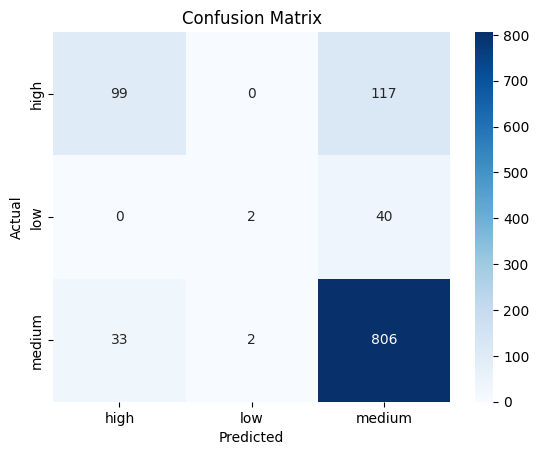

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['high', 'low', 'medium']
confusion = confusion_matrix(y_val, pred1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

혼동 행렬로 시각화한 결과, medium(quality 5, 6)를 예측하는 성능은 전체적으로 좋다.

반면 high와 low는 상당 부분 medium으로 오분류되었다. 현재 모델이 'medium' 중심 예측에 치우쳐져 있으며, 모델 개선이 필요한 것으로 보인다.

In [ ]:
# GridSearchCV로 하이퍼 파라미터 튜닝 후 모델에 학습하여 성능 개선
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 150, 200],      # 트리 개수
    'max_depth': [10, 15, 20],     # 최대 트리 깊이
    'min_samples_split': [3, 5, 8], # 노드 분할 최소 샘플 수
    'min_samples_leaf': [2, 3, 5],   # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2'] # 피처 선택 기준
}

# 랜덤 포레스트 객체 다시 생성
rf_clf1 = RandomForestClassifier(random_state = 0, class_weight= 'balanced')

# GridSearchCV 정의
grid_search = GridSearchCV(rf_clf1, param_grid=params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled_df, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
최적 하이퍼 파라미터: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150}


In [ ]:
# F1_weighted 기준 최적 하이퍼 파라미터로 모델 적합
grid_rf = grid_search.best_estimator_
pred2 = grid_rf.predict(X_val_scaled_df)

In [ ]:
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       216
           1       0.67      0.10      0.17        42
           2       0.85      0.95      0.90       841

    accuracy                           0.84      1099
   macro avg       0.76      0.53      0.57      1099
weighted avg       0.83      0.84      0.82      1099



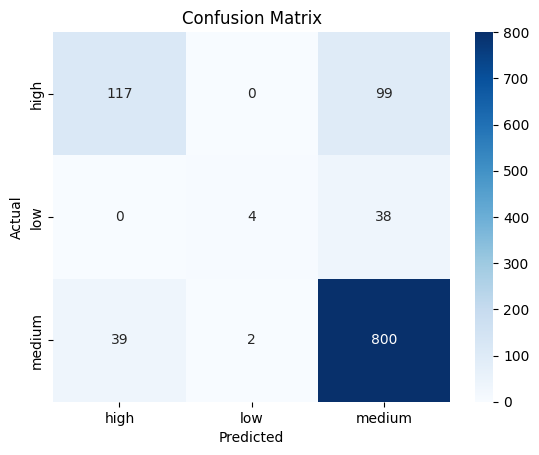

In [ ]:
grid_mx = confusion_matrix(y_val, pred2)
sns.heatmap(grid_mx, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

성능이 전반적으로 향상되었으나, low, high의 recall과 f1-score는 여전히 medium 클래스에 비해 낮은 수준을 보인다.

In [ ]:
# SMOTE로 오버 샘플링 적용

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
smote_x, smote_y = smote.fit_resample(X_train_scaled, y_train)

X_val_scaled = scaler.transform(X_val)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train_scaled.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', smote_x.shape,smote_y.shape)
print('SMOTE 적용 후 레이블 값 분포:', pd.Series(smote_y).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (4395, 12) (4395,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (10086, 12) (10086,)
SMOTE 적용 후 레이블 값 분포: quality_label
0    3362
2    3362
1    3362
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV

params2 = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 8],
    'min_samples_leaf': [3, 5],
    'max_features': ['sqrt']
}


# 클래스 개수가 동일하므로 가중치 없이 모델링
smote_rf = RandomForestClassifier(random_state = 0)

# GridSearchCV 정의
smote_grid = GridSearchCV(smote_rf, param_grid=params2, cv=3, n_jobs=-1, verbose=2)

smote_grid.fit(smote_x, smote_y)

print("최적 하이퍼 파라미터:", smote_grid.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
최적 하이퍼 파라미터: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
best_smote = smote_grid.best_estimator_
pred3 = best_smote.predict(X_val_scaled)

In [ ]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       216
           1       0.28      0.29      0.28        42
           2       0.88      0.84      0.86       841

    accuracy                           0.80      1099
   macro avg       0.59      0.61      0.60      1099
weighted avg       0.80      0.80      0.80      1099



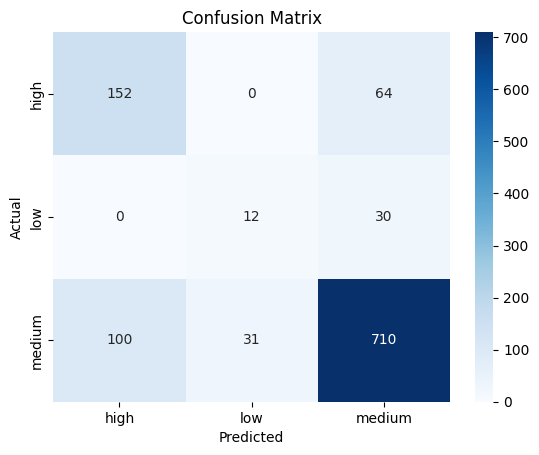

In [ ]:
smote_mx = confusion_matrix(y_val, pred3)
sns.heatmap(smote_mx, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

low의 recall, f1-score는 증가했지만 전반적인 성능은 하락했다.
smote를 하지 않고, gridsearch로 최적 파라미터를 적용하는 것이 랜덤 포레스트에서 가장 높은 정확도를 기록했다.

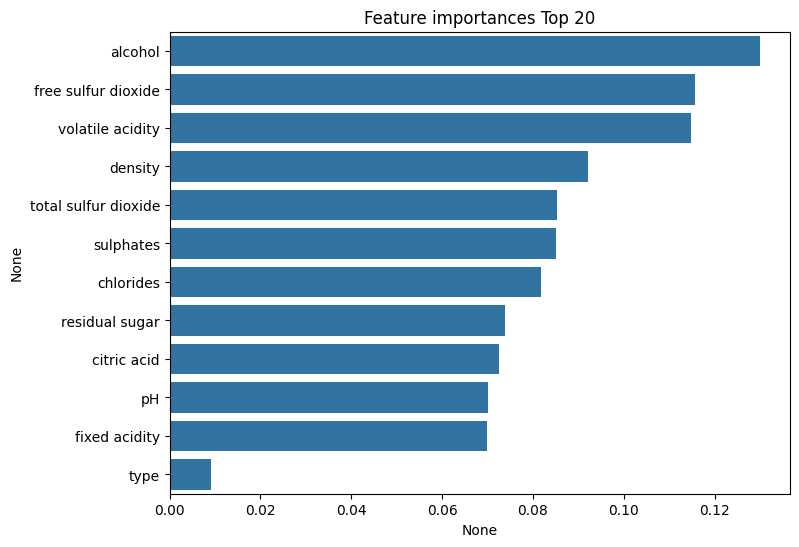

In [ ]:
# RandomForest best model
grid_rf = grid_search.best_estimator_

# 피처 중요도 확인/시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = grid_rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### **4. Voting**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

rf_clf = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42, n_jobs=-1)
svc_clf = SVC(probability=True, class_weight='balanced', random_state=42)
lr_clf = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
hgb_clf = HistGradientBoostingClassifier(random_state=42) # HistGradientBoosting은 class_weight 옵션 없음

# Soft voting 방식 사용
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('svc', svc_clf),
        ('lr', lr_clf),
        ('hgb', hgb_clf)
    ],
    voting='soft' # 각 모델의 예측 확률 평균 사용
)

voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_val_scaled)

print("=== 클래스별 예측 분포 ===")
print(pd.Series(y_pred).value_counts(), "\n")

print("=== 분류 성능 리포트 ===")
print(classification_report(y_val, y_pred), "\n")

print("=== 혼동 행렬 ===")
print(confusion_matrix(y_val, y_pred))

# 추가적인 F1 스코어 (Macro: 클래스별 F1 평균, Weighted: 클래스 크기 고려 F1 평균)
f1_macro = f1_score(y_val, y_pred, average='macro')
f1_weighted = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")

=== 클래스별 예측 분포 ===
2    940
0    155
1      4
Name: count, dtype: int64 

=== 분류 성능 리포트 ===
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       216
           1       0.50      0.05      0.09        42
           2       0.85      0.95      0.90       841

    accuracy                           0.84      1099
   macro avg       0.70      0.51      0.54      1099
weighted avg       0.82      0.84      0.82      1099
 

=== 혼동 행렬 ===
[[117   0  99]
 [  0   2  40]
 [ 38   2 801]]

Accuracy: 0.8371
Macro F1 Score: 0.5391
Weighted F1 Score: 0.8156


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
smote_x, smote_y = smote.fit_resample(X_train_scaled, y_train)

X_val_scaled = scaler.transform(X_val)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', smote_x.shape,smote_y.shape)
print('SMOTE 적용 후 레이블 값 분포:', pd.Series(smote_y).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (4395, 12) (4395,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (10086, 12) (10086,)
SMOTE 적용 후 레이블 값 분포: quality_label
0    3362
2    3362
1    3362
Name: count, dtype: int64


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42, n_jobs=-1)
svc_clf = SVC(probability=True, class_weight='balanced', random_state=42)
lr_clf = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
hgb_clf = HistGradientBoostingClassifier(random_state=42) # HistGradientBoosting은 class_weight 옵션 없음

# Soft voting 방식 사용
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('svc', svc_clf),
        ('lr', lr_clf),
        ('hgb', hgb_clf)
    ],
    voting='soft' # 각 모델의 예측 확률 평균 사용
)

voting_clf.fit(smote_x, smote_y)
y_pred = voting_clf.predict(X_val_scaled)

print("=== 클래스별 예측 분포 ===")
print(pd.Series(y_pred).value_counts(), "\n")

print("=== 분류 성능 리포트 ===")
print(classification_report(y_val, y_pred), "\n")

print("=== 혼동 행렬 ===")
print(confusion_matrix(y_val, y_pred))

# 추가적인 F1 스코어 (Macro: 클래스별 F1 평균, Weighted: 클래스 크기 고려 F1 평균)
f1_macro = f1_score(y_val, y_pred, average='macro')
f1_weighted = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")

=== 클래스별 예측 분포 ===
2    758
0    281
1     60
Name: count, dtype: int64 

=== 분류 성능 리포트 ===
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       216
           1       0.25      0.36      0.29        42
           2       0.89      0.81      0.85       841

    accuracy                           0.78      1099
   macro avg       0.57      0.64      0.60      1099
weighted avg       0.81      0.78      0.79      1099
 

=== 혼동 행렬 ===
[[163   0  53]
 [  0  15  27]
 [118  45 678]]

Accuracy: 0.7789
Macro F1 Score: 0.5994
Weighted F1 Score: 0.7891


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
svc_clf = SVC(probability=True, random_state=42)
lr_clf = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
hgb_clf = HistGradientBoostingClassifier(random_state=42) # HistGradientBoosting은 class_weight 옵션 없음

# Soft voting 방식 사용
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('svc', svc_clf),
        ('lr', lr_clf),
        ('hgb', hgb_clf)
    ],
    voting='soft' # 각 모델의 예측 확률 평균 사용
)

voting_clf.fit(smote_x, smote_y)
y_pred = voting_clf.predict(X_val_scaled)

print("=== 클래스별 예측 분포 ===")
print(pd.Series(y_pred).value_counts(), "\n")

print("=== 분류 성능 리포트 ===")
print(classification_report(y_val, y_pred), "\n")

print("=== 혼동 행렬 ===")
print(confusion_matrix(y_val, y_pred))

# 추가적인 F1 스코어 (Macro: 클래스별 F1 평균, Weighted: 클래스 크기 고려 F1 평균)
f1_macro = f1_score(y_val, y_pred, average='macro')
f1_weighted = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")

=== 클래스별 예측 분포 ===
2    758
0    281
1     60
Name: count, dtype: int64 

=== 분류 성능 리포트 ===
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       216
           1       0.25      0.36      0.29        42
           2       0.89      0.81      0.85       841

    accuracy                           0.78      1099
   macro avg       0.57      0.64      0.60      1099
weighted avg       0.81      0.78      0.79      1099
 

=== 혼동 행렬 ===
[[163   0  53]
 [  0  15  27]
 [118  45 678]]

Accuracy: 0.7789
Macro F1 Score: 0.5994
Weighted F1 Score: 0.7891


## **최종 모델 선택**

In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub['quality']

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: quality, Length: 1000, dtype: int64

In [ ]:
# train + test 합쳐서 LabelEncoder 학습
le = LabelEncoder()
le.fit(pd.concat([train['type'], test['type']], axis=0))

# 변환
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])

In [ ]:
# test.csv 불러오기
test = pd.read_csv('test.csv')

# type 컬럼 라벨 인코딩 (train에서 학습한 le 사용)
test['type'] = le.transform(test['type'])

# index 컬럼 제거
X_test = test.drop(['index'], axis=1)

# train에서 학습한 scaler로 표준화
X_test_scaled = scaler.transform(X_test)

# DataFrame으로 다시 만들기
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# 최종 예측 (GridSearchCV로 튜닝된 랜덤 포레스트)
test_pred = grid_rf.predict(X_test_scaled_df)

# 예측 결과 반영
sample_sub['quality'] = test_pred

# CSV 저장
sample_sub.to_csv('final_rf_submission.csv', index=False)